In [31]:
# !pip install dash
# !pip install plotly
# !pip install jupyter-dash

In [32]:
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.figure_factory as ff


In [33]:
df = pd.read_csv('ecommerce.csv')
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df

,InvoiceNo,UnitPrice,OrderValue,Quantit,Country,InvoiceDate,InvoiceTime,Year-Month,Major Category,Minor Category,Description
0,549185,0.85,10.20,12,United Kingdom,7/4/11,09:35,2011-04,Clothes,Tops,PACK OF 20 NAPKINS PANTRY DESIGN
1,576381,2.95,35.40,12,United Kingdom,15/11/11,09:26,2011-11,Clothes,Shoes,NATURAL SLATE HEART CHALKBOARD
2,551192,1.25,20.00,16,United Kingdom,27/4/11,10:54,2011-04,Kitchen,Cutlery,36 PENCILS TUBE SKULLS
3,573553,7.46,7.46,1,United Kingdom,31/10/11,13:48,2011-10,Garden,Turf,SET 6 SCHOOL MILK BOTTLES IN CRATE
4,539436,2.51,2.51,1,United Kingdom,17/12/10,14:49,2010-12,Garden,Hoses,FINE WICKER HEART
...,...,...,...,...,...,...,...,...,...,...,...
695,564087,1.25,20.00,16,Hong Kong,23/8/11,09:38,2011-08,Clothes,Tops,WOOD STAMP SET THANK YOU
696,553148,0.55,13.20,24,Hong Kong,13/5/11,14:09,2011-05,Garden,Hoses,GREEN POLKADOT BOWL
697,564087,4.95,29.70,6,Hong Kong,23/8/11,09:38,2011-08,Garden,Rakes,TOY TIDY SPACEBOY
698,553148,0.85,27.20,32,Hong Kong,13/5/11,14:09,2011-05,Kitchen,Cooking Knives,RED RETROSPOT CHILDRENS UMBRELLA


### Create a Plots with plotly:
Imagine your managers asked you to give them some visualizations about their company that reflects good insights, you are now the manager and the employee at the same time, ask your self some analytical questions
your solution should have the following:
* distrbution plot.
* pie chart.
* Scatter plot.
* Line chart.
* box/violin/strip
* Bar chart.
* pairplot


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   InvoiceNo       700 non-null    int64  
 1   UnitPrice       700 non-null    float64
 2   OrderValue      700 non-null    float64
 3   Quantit         700 non-null    int64  
 4   Country         700 non-null    object 
 5    InvoiceDate    700 non-null    object 
 6   InvoiceTime     700 non-null    object 
 7   Year-Month      700 non-null    object 
 8   Major Category  700 non-null    object 
 9   Minor Category  700 non-null    object 
 10  Description     700 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 60.3+ KB


In [35]:
df.columns = df.columns.str.strip().str.replace(' ', '_')



In [36]:
numeric_values = df.select_dtypes(include=[np.number])
numeric_values = numeric_values.drop(columns=['InvoiceNo'], axis=1)

for col in numeric_values:
    fig = px.histogram(numeric_values, x=col, title=f"Histogram for {col}")
    fig.show()
    listed_col = numeric_values[col].to_list()
    fig = ff.create_distplot([listed_col], [col])
    fig.show()


In [37]:
fig=px.pie(df, names='Major_Category',values='OrderValue', title='Sales Distribution by Major Category')
fig.show()


In [38]:
px.scatter(df, x='Quantit', y='OrderValue', color='Major_Category' )

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   InvoiceNo       700 non-null    int64  
 1   UnitPrice       700 non-null    float64
 2   OrderValue      700 non-null    float64
 3   Quantit         700 non-null    int64  
 4   Country         700 non-null    object 
 5   InvoiceDate     700 non-null    object 
 6   InvoiceTime     700 non-null    object 
 7   Year-Month      700 non-null    object 
 8   Major_Category  700 non-null    object 
 9   Minor_Category  700 non-null    object 
 10  Description     700 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 60.3+ KB


In [40]:
#convert to datetime 
df['Year-Month'] = pd.to_datetime(df['Year-Month'], format='%Y-%m')
df['Year'] = pd.to_datetime(df['Year-Month'], format='%Y-%m').dt.year
df['Month'] = pd.to_datetime(df['Year-Month'], format='%Y-%m').dt.month
df


,InvoiceNo,UnitPrice,OrderValue,Quantit,Country,InvoiceDate,InvoiceTime,Year-Month,Major_Category,Minor_Category,Description,Year,Month
0,549185,0.85,10.20,12,United Kingdom,7/4/11,09:35,2011-04-01,Clothes,Tops,PACK OF 20 NAPKINS PANTRY DESIGN,2011,4
1,576381,2.95,35.40,12,United Kingdom,15/11/11,09:26,2011-11-01,Clothes,Shoes,NATURAL SLATE HEART CHALKBOARD,2011,11
2,551192,1.25,20.00,16,United Kingdom,27/4/11,10:54,2011-04-01,Kitchen,Cutlery,36 PENCILS TUBE SKULLS,2011,4
3,573553,7.46,7.46,1,United Kingdom,31/10/11,13:48,2011-10-01,Garden,Turf,SET 6 SCHOOL MILK BOTTLES IN CRATE,2011,10
4,539436,2.51,2.51,1,United Kingdom,17/12/10,14:49,2010-12-01,Garden,Hoses,FINE WICKER HEART,2010,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,564087,1.25,20.00,16,Hong Kong,23/8/11,09:38,2011-08-01,Clothes,Tops,WOOD STAMP SET THANK YOU,2011,8
696,553148,0.55,13.20,24,Hong Kong,13/5/11,14:09,2011-05-01,Garden,Hoses,GREEN POLKADOT BOWL,2011,5
697,564087,4.95,29.70,6,Hong Kong,23/8/11,09:38,2011-08-01,Garden,Rakes,TOY TIDY SPACEBOY,2011,8
698,553148,0.85,27.20,32,Hong Kong,13/5/11,14:09,2011-05-01,Kitchen,Cooking Knives,RED RETROSPOT CHILDRENS UMBRELLA,2011,5


In [41]:
df= df.sort_values(['Year','Month'])
df

,InvoiceNo,UnitPrice,OrderValue,Quantit,Country,InvoiceDate,InvoiceTime,Year-Month,Major_Category,Minor_Category,Description,Year,Month
4,539436,2.51,2.51,1,United Kingdom,17/12/10,14:49,2010-12-01,Garden,Hoses,FINE WICKER HEART,2010,12
12,538663,12.75,25.50,2,United Kingdom,13/12/10,15:45,2010-12-01,Household,Rugs,CAKE STAND 3 TIER MAGIC GARDEN,2010,12
16,537369,4.25,4.25,1,United Kingdom,6/12/10,12:41,2010-12-01,Clothes,Tops,ROSE 3 WICK MORRIS BOX CANDLE,2010,12
19,539451,1.28,1.28,1,United Kingdom,17/12/10,16:59,2010-12-01,Clothes,Shoes,12 PENCILS SMALL TUBE RED RETROSPOT,2010,12
20,537057,2.95,2.95,1,United Kingdom,5/12/10,11:49,2010-12-01,Household,Rugs,PAPER CHAIN KIT 50'S CHRISTMAS,2010,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,581587,4.15,16.60,4,France,9/12/11,12:50,2011-12-01,Garden,Hoses,DOTCOM POSTAGE,2011,12
565,580986,0.21,5.04,24,France,6/12/11,16:34,2011-12-01,Garden,Rakes,RED RETROSPOT CHILDRENS UMBRELLA,2011,12
575,580705,4.15,16.60,4,France,5/12/11,16:28,2011-12-01,Household,Chairs,GYMKHANA TREASURE BOOK BOX,2011,12
585,580160,0.42,8.40,20,France,2/12/11,10:47,2011-12-01,Clothes,Hats,PINK REGENCY TEACUP AND SAUCER,2011,12


In [42]:
total_sales=df.groupby(df['Year-Month'])['OrderValue'].sum().reset_index()
fig = px.line(
    total_sales,
    x='Year-Month',
    y='OrderValue',
    title='Monthly total Sales Over Time',
    markers=True
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Order Value',
    xaxis=dict(
         dtick="M1",
         tickformat='%Y-%m', 
       
    )
)

fig.show()


In [43]:
monthly_sales = df.groupby(['Year-Month', 'Major_Category'])['OrderValue'].sum().reset_index()
fig = px.line(
    monthly_sales,
    x='Year-Month',
    y='OrderValue',
    color='Major_Category',
    title='Monthly Sales by Major Category',
    markers=True
)
fig.show()

In [44]:
px.box(df, x='Major_Category', y='OrderValue', title='Box Plot of Order Value by Major Category')

In [45]:
px.violin(df, x='Major_Category', y='OrderValue', title='Violin Plot of Order Value by Major Category')

In [46]:
px.strip(df, x='Major_Category', y='OrderValue', title='Strip Plot of Order Value by Major Category')

In [47]:
corr_matrix = df.select_dtypes(include='number').corr().round(2)
corr_matrix = corr_matrix.drop(columns=['Year', 'Month'])  
corr_matrix = corr_matrix.drop(index=['Year', 'Month'])
fig = px.imshow(corr_matrix, text_auto=True, title='Correlation Matrix')
fig.show()


Text(0.5, 1.0, 'Average Order Value by Major Category')

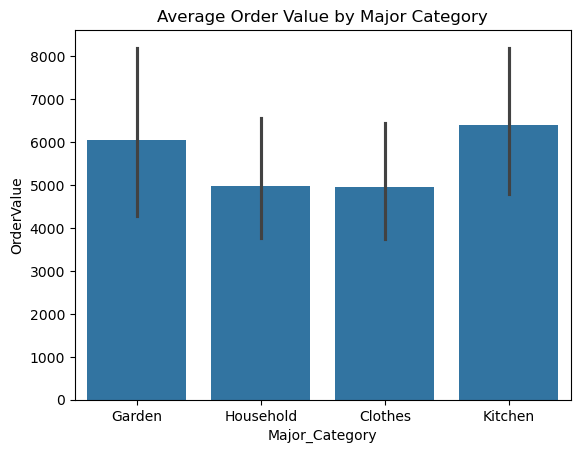

In [49]:
sns.barplot(
    data=df,
    x='Major_Category',
    y='OrderValue',
    estimator='sum'
).set_title('Average Order Value by Major Category')

Text(0.5, 1.0, 'Average Order Value by Country')

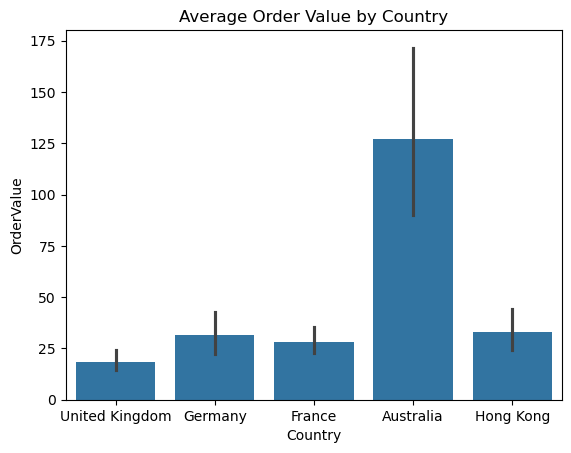

In [53]:
sns.barplot(df, x='Country', y='OrderValue', estimator='mean').set_title('Average Order Value by Country')

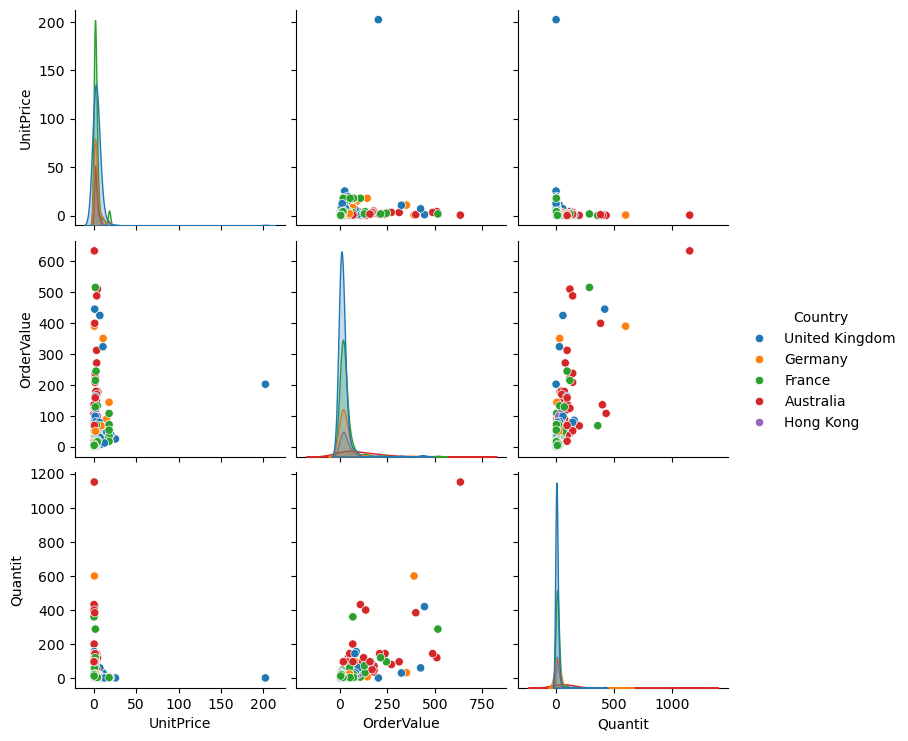

In [52]:
sns.pairplot(df, vars=['UnitPrice', 'OrderValue', 'Quantit'], hue='Country')
